In [13]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [14]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b90e9ac8e79b4097bb1a20c7435fdd53 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='BhvzIxJZdWFsYBY9mNaYq_eFhOE-xQsPNFlVNhzk1j6f',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_b90e9ac8e79b4097bb1a20c7435fdd53.get_object(Bucket='machinelearningproject-donotdelete-pr-y1ucldkwaptpzk',Key='listings.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

listings_df = pd.read_csv(body)
listings_df.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20200608201310,2020-06-10,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.04
1,9693,https://www.airbnb.com/rooms/9693,20200608201310,2020-06-10,Top Location on Canal (Center Flat),You will love your stay here. It is a beautifu...,This beautiful apartment in the heart of 17th ...,You will love your stay here. It is a beautifu...,none,You will be on a beautiful quite canal and wil...,...,t,f,moderate,f,f,1,1,0,0,0.44
2,20168,https://www.airbnb.com/rooms/20168,20200608201310,2020-06-10,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,For those who like all facets of city life. In...,17th century Dutch townhouse in the heart of t...,none,Located just in between famous central canals....,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,2.72
3,25428,https://www.airbnb.com/rooms/25428,20200608201310,2020-06-10,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,"This nicely furnished, newly renovated apt is...",Lovely apt in Centre ( lift & fireplace) near ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.17
4,27886,https://www.airbnb.com/rooms/27886,20200608201310,2020-06-10,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.12


In [15]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19352 entries, 0 to 19351
Columns: 106 entries, id to reviews_per_month
dtypes: float64(22), int64(21), object(63)
memory usage: 15.7+ MB


In [16]:
listings_df.set_index('id', inplace=True)

In [17]:
# convert string dates to datetime objects
listings_df.last_scraped = pd.to_datetime(listings_df.last_scraped)

In [18]:
# convert price column to float type after stripping dollar, comma character
listings_df.price = listings_df.price.str.lstrip('$').str.replace(',', '').astype('float')

In [19]:
#drop columns with no records
listings_df.drop(['neighbourhood_group_cleansed', 'jurisdiction_names', 'license', 'has_availability'],
                 axis=1, inplace=True)

In [20]:
# drop rows with price <= 0, bathrooms < 1, bedrooms <=0, accommodates <= 0

listings_df = listings_df[listings_df.price > 0]
listings_df = listings_df[listings_df.bathrooms >= 1]
listings_df = listings_df[listings_df.bedrooms > 0]
listings_df = listings_df[listings_df.accommodates > 0]
listings_df = listings_df[listings_df.review_scores_rating > 0]

In [21]:
# replace float values to lower value in bathroom column

listings_df['bathrooms'] = listings_df.bathrooms.replace(1.5, 1)
listings_df['bathrooms'] = listings_df.bathrooms.replace(2.5, 2)
listings_df['bathrooms'] = listings_df.bathrooms.replace(3.5, 3)
listings_df['bathrooms'] = listings_df.bathrooms.replace(4.5, 4)

In [22]:
# convert bedrooms, bathrooms, accommodates count to int from float
listings_df.bedrooms = listings_df.bedrooms.astype('int')
listings_df.bathrooms = listings_df.bathrooms.astype('int')
listings_df.accommodates = listings_df.accommodates.astype('int')

In [23]:
listings_df.city.unique()

array(['Amsterdam', 'De Pijp', 'Bos en Lommer', 'Watergraafsmeer',
       'Jordaan', 'Zeeburg', 'Amsterdam-Zuidoost', 'Amsterdam Zuid-Oost',
       'Halfweg', 'Ámsterdam', 'Amsterdam ', 'Jordaan, Amsterdam',
       'Amsterdam Zuidoost', 'Amsterdão', 'Nederland', 'Amsterdam West',
       'Amsterdam centrum', 'Lijnden', 'Amsterdam, Noord-Holland, NL',
       nan, 'Diemen', 'Amsterdam (Zunderdorp)', 'Amstelveen',
       'Duivendrecht', '1015 SN Amsterdam', 'AMSTERDAM',
       'North Amsterdam', 'Central Amsterdam', 'amsterdam', 'Landsmeer',
       'Serooskerkenweg 71-1', 'Houthavens', 'Oostzaan'], dtype=object)

In [24]:
listings_df['city_cleansed'] = listings_df.city.copy()

In [25]:
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Amsterdam Zuid-Oost', 'Amsterdam-Zuidoost')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Amsterdāo', 'Amsterdam')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Amsterdam, Noord-Holland, NL', 'Amsterdam-Noord')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Jordan,Amsterdam', 'Jordan')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Amsterdam Zuid', 'Amsterdam-Zuidoost')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('amsterdam', 'Amsterdam')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('AMSTERDAM', 'Amsterdam')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Amsterdam (Zunderdorp)', 'Zunderdorp')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Amsterdam Zuidoost', 'Amsterdam-Zuidoost')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Amsterdam-Zuid', 'Amsterdam-Zuidoost')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace( 'nan', 'Amsterdam')

In [26]:
listings_df.city_cleansed.unique()

array(['Amsterdam', 'De Pijp', 'Bos en Lommer', 'Watergraafsmeer',
       'Jordaan', 'Zeeburg', 'Amsterdam-Zuidoost', 'Halfweg', 'Ámsterdam',
       'Amsterdam ', 'Jordaan, Amsterdam', 'Amsterdão', 'Nederland',
       'Amsterdam West', 'Amsterdam centrum', 'Lijnden',
       'Amsterdam-Noord', nan, 'Diemen', 'Zunderdorp', 'Amstelveen',
       'Duivendrecht', '1015 SN Amsterdam', 'North Amsterdam',
       'Central Amsterdam', 'Landsmeer', 'Serooskerkenweg 71-1',
       'Houthavens', 'Oostzaan'], dtype=object)

In [27]:
listings_df.fillna(0, inplace=True)

In [28]:
listings_df.shape

(15751, 102)

# Exploratory data analysis
**How to predict price based on different features**

In [29]:
features_df=listings_df.copy()

In [30]:
#checking if target label has all the entries recorded
features_df.price.count()

15751

In [31]:
features_df.shape

(15751, 102)

In [32]:
#number of listings based on room type
room_type_count= features_df.room_type.value_counts()

In [33]:
room_type_count

Entire home/apt    12429
Private room        3083
Hotel room           197
Shared room           42
Name: room_type, dtype: int64

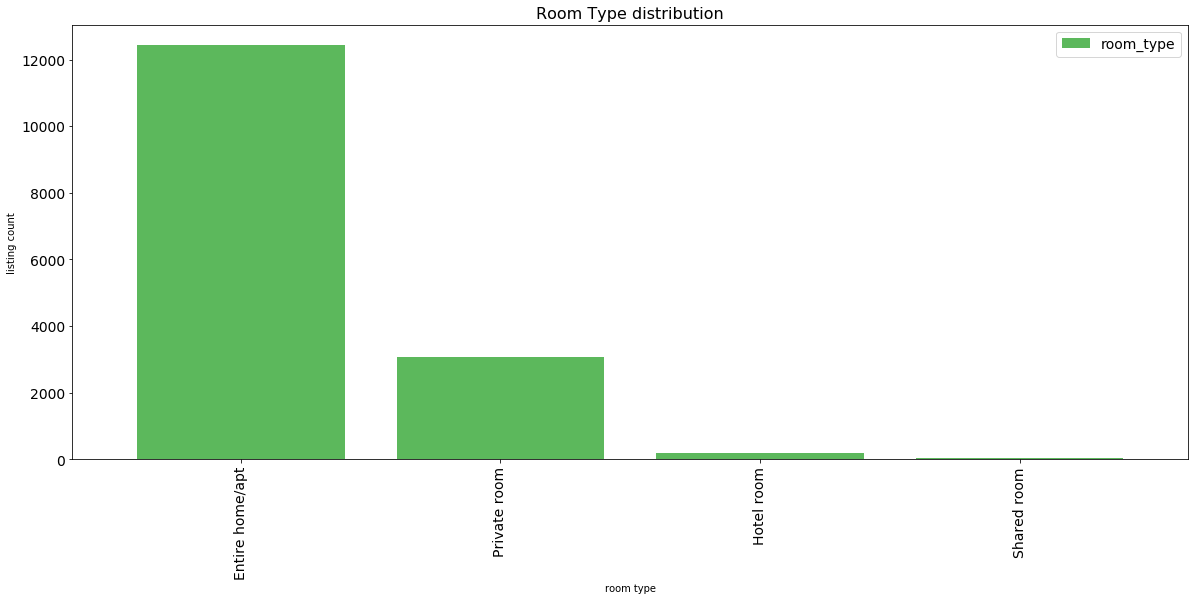

In [34]:
ax = room_type_count.plot(kind='bar', 
                    figsize=(20, 8),
                    rot=90,color = ['#5cb85c'],
                    width=.8,fontsize=14)
ax.set_title('Room Type distribution',fontsize=16)
ax.legend(fontsize=14,facecolor = 'white') 
ax.set_xlabel('room type')
ax.set_ylabel('listing count')
plt.show()

In [35]:
features_df.property_type.unique()

array(['Apartment', 'Townhouse', 'Houseboat', 'Bed and breakfast',
       'Guest suite', 'Boat', 'Loft', 'House', 'Condominium', 'Villa',
       'Serviced apartment', 'Farm stay', 'Chalet', 'Bungalow',
       'Tiny house', 'Other', 'Guesthouse', 'Boutique hotel',
       'Lighthouse', 'Barn', 'Cabin', 'Hotel', 'Cottage', 'Dome house',
       'Earth house', 'Aparthotel', 'Campsite', 'Hostel', 'Island',
       'Yurt'], dtype=object)

In [36]:
features_df = features_df[features_df.property_type!=0]

In [37]:
#listings based on property type
property_type_count = features_df.property_type.value_counts()

In [38]:
property_type_count

Apartment             12068
House                  1302
Townhouse               556
Bed and breakfast       300
Loft                    297
Condominium             266
Boat                    260
Houseboat               258
Guest suite             110
Aparthotel               71
Serviced apartment       51
Boutique hotel           34
Hotel                    31
Villa                    28
Hostel                   28
Guesthouse               24
Other                    18
Tiny house               12
Cottage                   9
Farm stay                 7
Cabin                     6
Bungalow                  4
Barn                      3
Campsite                  2
Dome house                1
Chalet                    1
Lighthouse                1
Earth house               1
Yurt                      1
Island                    1
Name: property_type, dtype: int64

Text(0, 0.5, 'Number of listings')

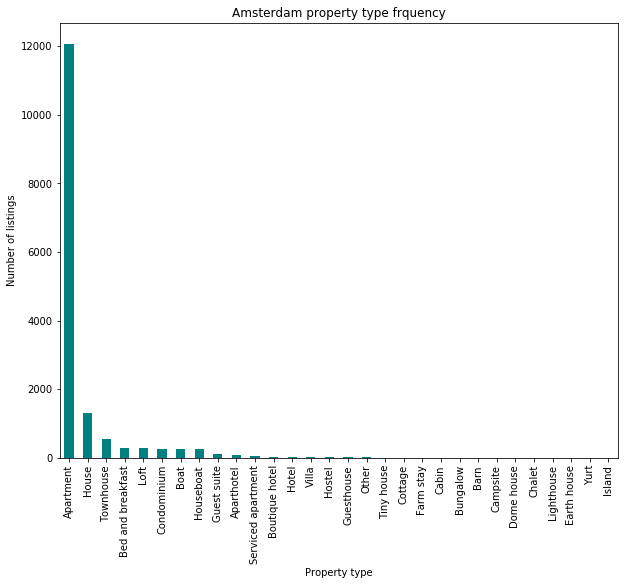

In [39]:
property_type_count.plot.bar(color = 'teal', figsize=(10,8), title='Amsterdam property type frquency')
plt.xlabel('Property type')
plt.ylabel('Number of listings')

In [40]:
# analysing prices for room type and property type

prices_data = features_df.groupby(['property_type','room_type']).price.mean()

In [41]:
prices_data

property_type       room_type      
Aparthotel          Entire home/apt     334.812500
                    Hotel room          229.452830
                    Private room        485.500000
Apartment           Entire home/apt     161.931058
                    Private room        102.974625
                    Shared room          74.259259
Barn                Entire home/apt     230.666667
Bed and breakfast   Entire home/apt     100.000000
                    Hotel room          153.296875
                    Private room        140.202586
                    Shared room          90.000000
Boat                Entire home/apt     251.200000
                    Private room        149.565217
                    Shared room         327.333333
Boutique hotel      Hotel room          290.105263
                    Private room        175.600000
Bungalow            Entire home/apt     113.000000
                    Private room         95.000000
Cabin               Entire home/apt     131.66

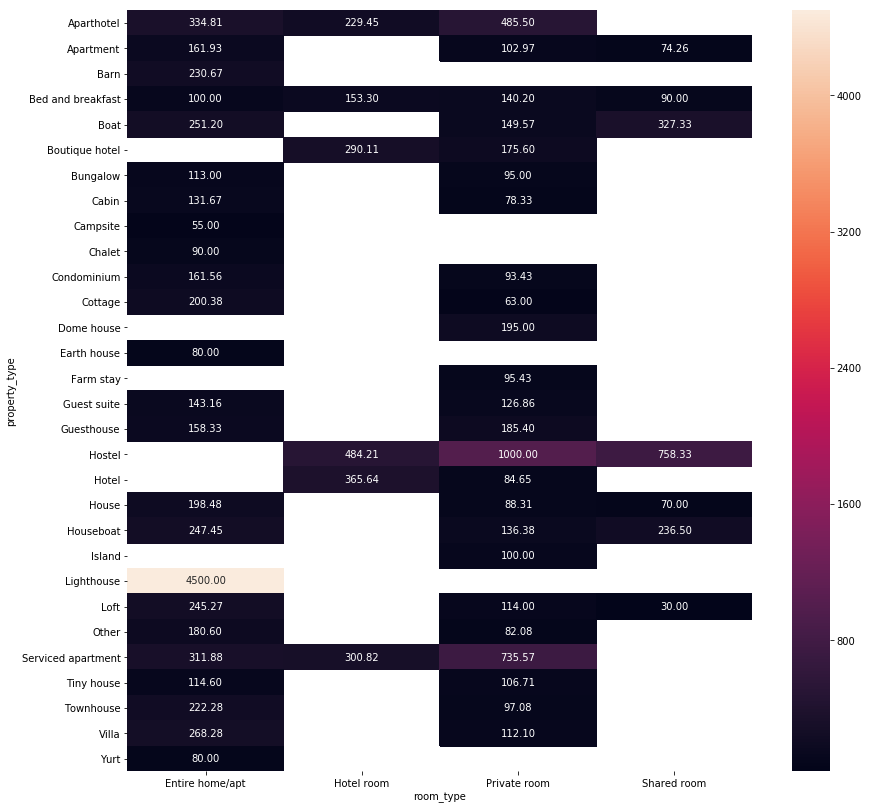

In [42]:
plt.figure(figsize=(14,14));
sns.heatmap(features_df.groupby(['property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".2f");

In [43]:
features_df.groupby(['neighbourhood_cleansed','room_type']).price.mean()

neighbourhood_cleansed                  room_type      
Bijlmer-Centrum                         Entire home/apt    117.486486
                                        Private room        75.666667
Bijlmer-Oost                            Entire home/apt    130.147059
                                        Private room        62.387755
Bos en Lommer                           Entire home/apt    131.649551
                                        Private room        83.030075
                                        Shared room         49.000000
Buitenveldert - Zuidas                  Entire home/apt    155.236111
                                        Private room        81.068182
Centrum-Oost                            Entire home/apt    211.510814
                                        Hotel room         236.548387
                                        Private room       132.507987
                                        Shared room        112.000000
Centrum-West                      

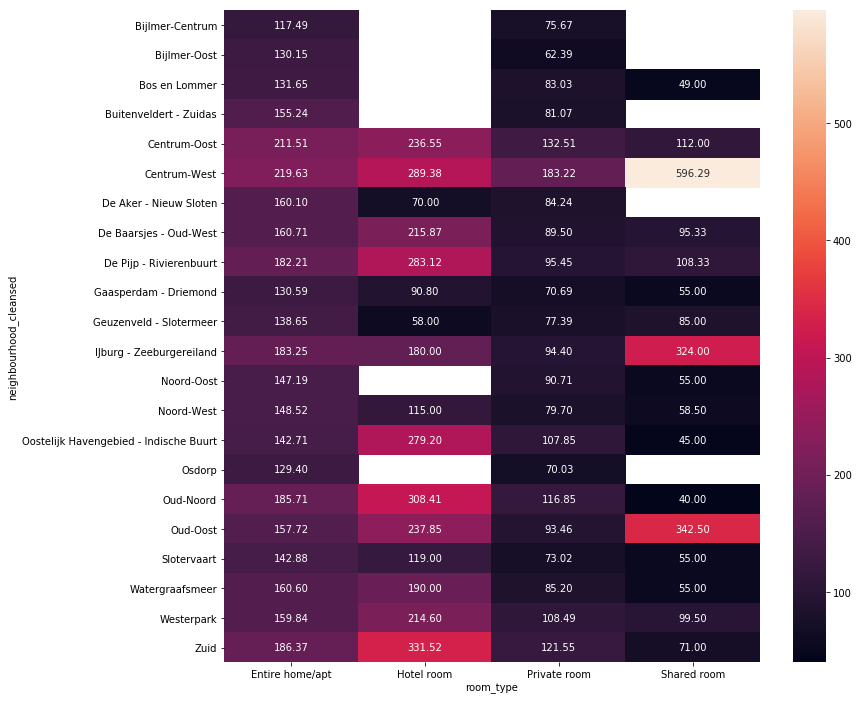

In [44]:

plt.figure(figsize=(12,12));
sns.heatmap(features_df.groupby(['neighbourhood_cleansed', 'room_type']).price.mean().unstack(),annot=True, fmt=".2f")

In [45]:
features_df.groupby(['city_cleansed','room_type']).price.mean()

city_cleansed         room_type      
0                     Entire home/apt     187.500000
                      Private room         88.333333
1015 SN Amsterdam     Private room        200.000000
Amstelveen            Entire home/apt     185.000000
                      Private room         75.000000
Amsterdam             Entire home/apt     171.766467
                      Hotel room          248.680851
                      Private room        110.081345
                      Shared room         159.358974
Amsterdam             Entire home/apt     408.166667
                      Private room         73.000000
Amsterdam West        Entire home/apt     255.000000
Amsterdam centrum     Entire home/apt     295.000000
Amsterdam-Noord       Entire home/apt     180.000000
Amsterdam-Zuidoost    Entire home/apt     114.827586
                      Hotel room           90.800000
                      Private room         66.728395
                      Shared room          55.000000
Amsterdã

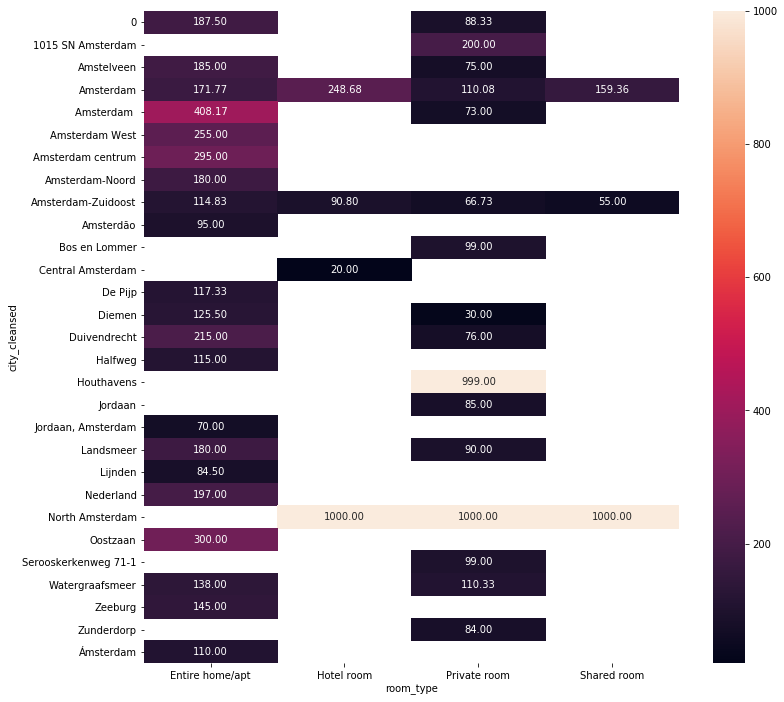

In [46]:
plt.figure(figsize=(12,12));
sns.heatmap(features_df.groupby(['city_cleansed', 'room_type']).price.mean().unstack(),annot=True, fmt=".2f");

# When to invest in Airbnb?

In [47]:
price_per_room_type = features_df.groupby(['room_type']).price.mean()

In [48]:
price_per_room_type

room_type
Entire home/apt    171.698608
Hotel room         254.954315
Private room       110.216996
Shared room        196.904762
Name: price, dtype: float64

Text(0, 0.5, 'Price')

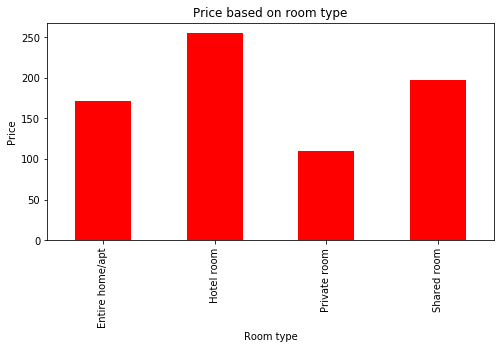

In [49]:
price_per_room_type.plot.bar(color = 'red', figsize=(8,4), title='Price based on room type')
plt.xlabel('Room type')
plt.ylabel('Price')

In [50]:
price_per_neighborhood = features_df.groupby(['neighbourhood_cleansed']).price.mean()

In [51]:
price_per_neighborhood

neighbourhood_cleansed
Bijlmer-Centrum                            94.536585
Bijlmer-Oost                               90.144578
Bos en Lommer                             124.476451
Buitenveldert - Zuidas                    137.877660
Centrum-Oost                              193.050038
Centrum-West                              212.587809
De Aker - Nieuw Sloten                    122.028846
De Baarsjes - Oud-West                    150.058718
De Pijp - Rivierenbuurt                   170.473442
Gaasperdam - Driemond                      95.879630
Geuzenveld - Slotermeer                   116.404908
IJburg - Zeeburgereiland                  162.033994
Noord-Oost                                128.286996
Noord-West                                127.578073
Oostelijk Havengebied - Indische Buurt    136.997484
Osdorp                                    106.377551
Oud-Noord                                 174.661795
Oud-Oost                                  151.351201
Slotervaart            

Text(0.5, 1.0, 'Neighborhood and price distribution')

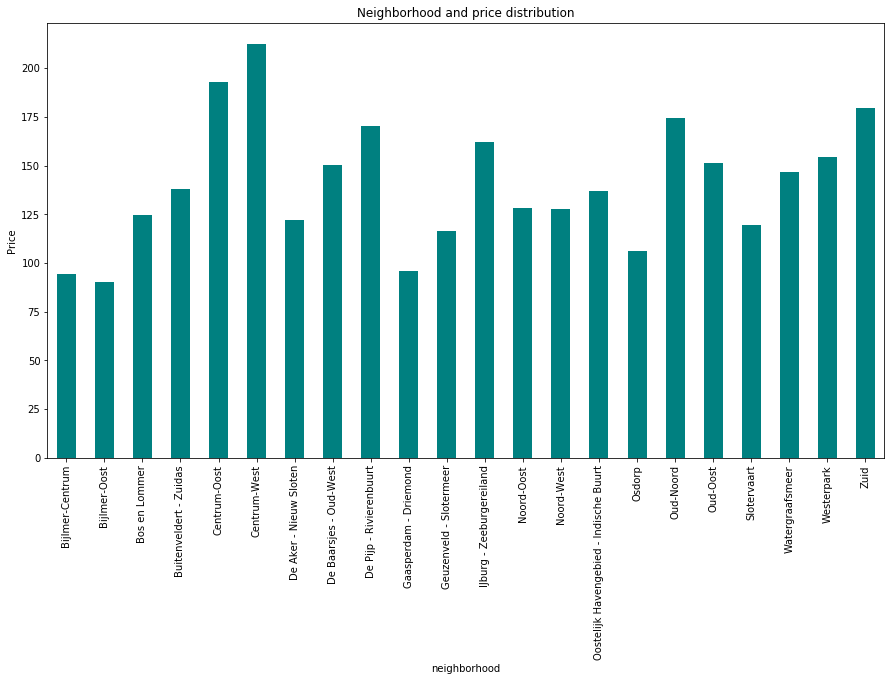

In [52]:
plt.figure(figsize=(15,8))
price_per_neighborhood.plot(kind='bar', color='teal')
plt.xlabel('neighborhood')
plt.ylabel('Price')
plt.title('Neighborhood and price distribution')

In [53]:
price_per_city = features_df.groupby(['city_cleansed']).price.mean()

In [54]:
price_per_city

city_cleansed
0                        128.000000
1015 SN Amsterdam        200.000000
Amstelveen               148.333333
Amsterdam                160.849710
Amsterdam                309.588235
Amsterdam West           255.000000
Amsterdam centrum        295.000000
Amsterdam-Noord          180.000000
Amsterdam-Zuidoost        86.717241
Amsterdão                 95.000000
Bos en Lommer             99.000000
Central Amsterdam         20.000000
De Pijp                  117.333333
Diemen                    77.750000
Duivendrecht             168.666667
Halfweg                  115.000000
Houthavens               999.000000
Jordaan                   85.000000
Jordaan, Amsterdam        70.000000
Landsmeer                135.000000
Lijnden                   84.500000
Nederland                197.000000
North Amsterdam         1000.000000
Oostzaan                 300.000000
Serooskerkenweg 71-1      99.000000
Watergraafsmeer          121.400000
Zeeburg                  145.000000
Zunderdorp    

Text(0.5, 1.0, 'City vs Average price distribution')

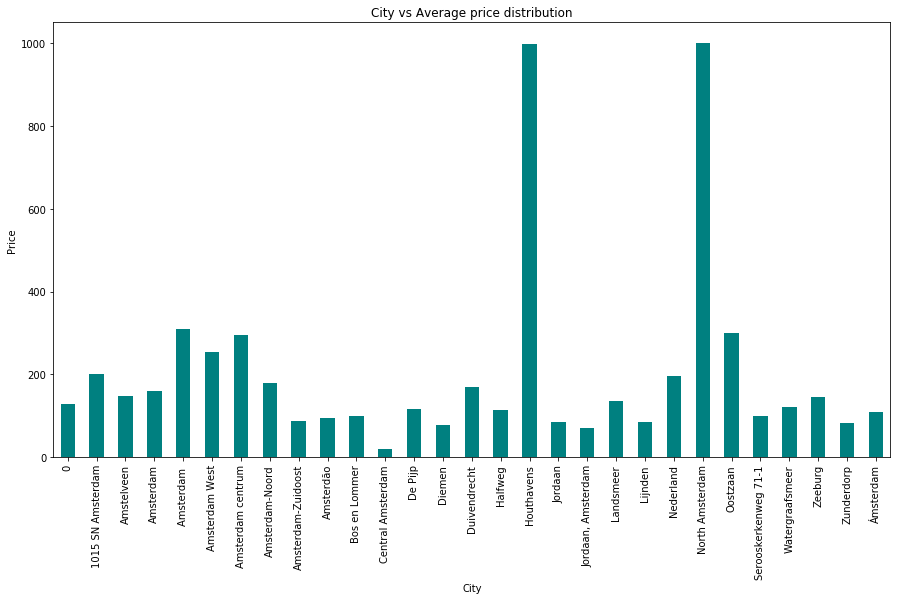

In [55]:
plt.figure(figsize=(15,8))
price_per_city.plot(kind='bar', color='teal')
plt.xlabel('City')
plt.ylabel('Price')
plt.title('City vs Average price distribution')

In [56]:
price_per_property_type = features_df.groupby(['property_type']).price.mean()

In [57]:
price_per_property_type

property_type
Aparthotel             260.408451
Apartment              152.301293
Barn                   230.666667
Bed and breakfast      142.426667
Boat                   216.115385
Boutique hotel         239.588235
Bungalow               108.500000
Cabin                  105.000000
Campsite                55.000000
Chalet                  90.000000
Condominium            146.191729
Cottage                185.111111
Dome house             195.000000
Earth house             80.000000
Farm stay               95.428571
Guest suite            130.563636
Guesthouse             175.250000
Hostel                 598.214286
Hotel                  211.548387
House                  173.070661
Houseboat              209.476744
Island                 100.000000
Lighthouse            4500.000000
Loft                   222.000000
Other                  109.444444
Serviced apartment     363.960784
Tiny house             110.000000
Townhouse              190.080935
Villa                  212.500000


Text(0.5, 1.0, 'Property type vs Average price distribution')

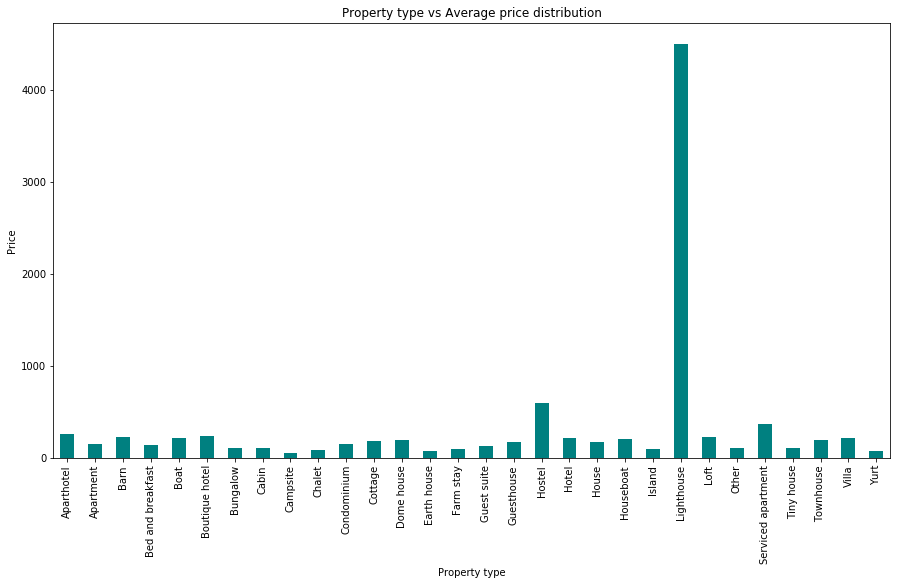

In [58]:
plt.figure(figsize=(15,8))
price_per_property_type.plot(kind='bar', color='teal')
plt.xlabel('Property type')
plt.ylabel('Price')
plt.title('Property type vs Average price distribution')

In [59]:
price_per_street = features_df.groupby(['street']).price.mean()

In [60]:
price_per_street

street
1015 SN Amsterdam, Noord-Holland, Netherlands                   200.000000
AMSTERDAM, Noord Holland, Netherlands                           157.000000
Amstelveen, NH, Netherlands                                      75.000000
Amstelveen, Noord-Holland, Netherlands                          185.000000
Amsterdam (Zunderdorp), Noord-Holland, Netherlands               84.000000
Amsterdam , 2 de Egelantiersdwarsstraat 13 III, Netherlands     195.000000
Amsterdam , Amsterdam, Netherlands                              383.000000
Amsterdam , Netherlands                                         332.272727
Amsterdam , Noord Holland, Netherlands                           65.000000
Amsterdam , Noord-Holland, Netherlands                          600.000000
Amsterdam , North Holland, Netherlands                          182.500000
Amsterdam West, NH, Netherlands                                 255.000000
Amsterdam Zuid-Oost, NH, Netherlands                             97.250000
Amsterdam Zuid-Oos

Text(0.5, 1.0, 'Street vs Average price distribution')

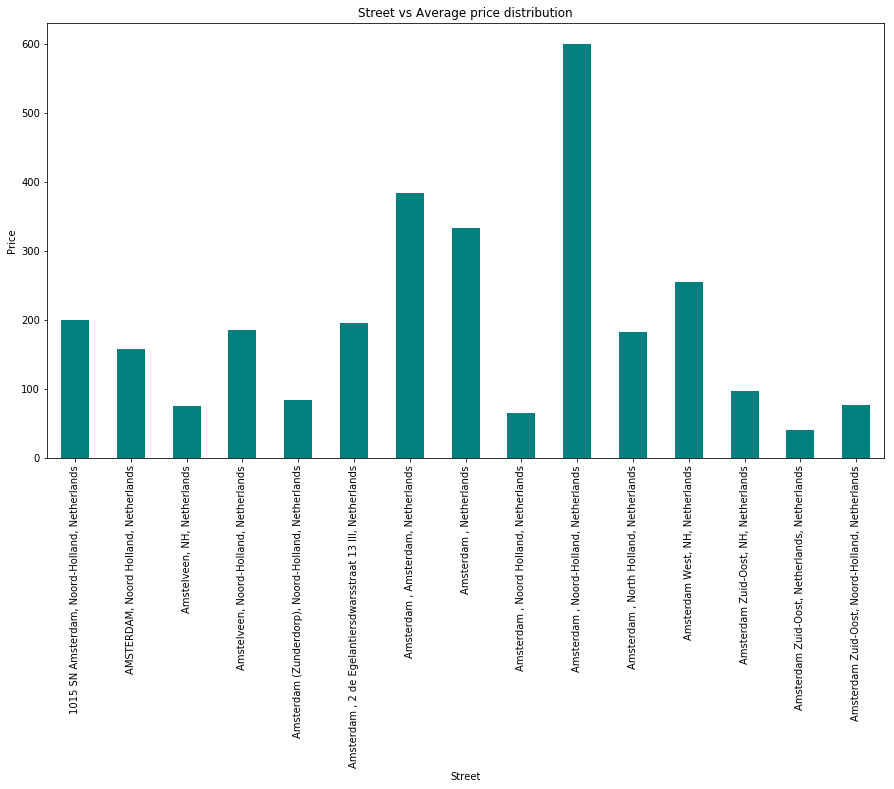

In [61]:
plt.figure(figsize=(15,8))
price_per_street[:15].plot(kind='bar', color='teal')
plt.xlabel('Street')
plt.ylabel('Price')
plt.title('Street vs Average price distribution')

# Predicting reviews and what aspects correlate with reviews

In [62]:
features_df.review_scores_rating.unique()

array([ 98.,  99.,  89., 100.,  97.,  95.,  96.,  93.,  92.,  91.,  87.,
        94.,  85.,  90.,  86.,  72.,  80.,  88.,  84.,  83.,  77.,  81.,
        73.,  82.,  70.,  60.,  65.,  40.,  20.,  78.,  76.,  64.,  75.,
        71.,  74.,  67.,  79.,  50.,  56.,  68.,  66.,  47.,  53.,  57.,
        63.,  48.,  55.])

In [63]:
ratings_per_neighborhood = features_df.groupby(['neighbourhood_cleansed','property_type']).review_scores_rating.mean()

In [64]:
ratings_per_neighborhood.sort_values(ascending=False)

neighbourhood_cleansed                  property_type     
Zuid                                    Villa                 100.000000
Oud-Oost                                Villa                 100.000000
                                        Other                 100.000000
                                        Earth house           100.000000
Oud-Noord                               Lighthouse            100.000000
Oostelijk Havengebied - Indische Buurt  Guest suite           100.000000
Noord-West                              Villa                 100.000000
                                        Tiny house            100.000000
                                        Cottage               100.000000
                                        Cabin                 100.000000
Noord-Oost                              Villa                 100.000000
                                        Bungalow              100.000000
Gaasperdam - Driemond                   Tiny house            100

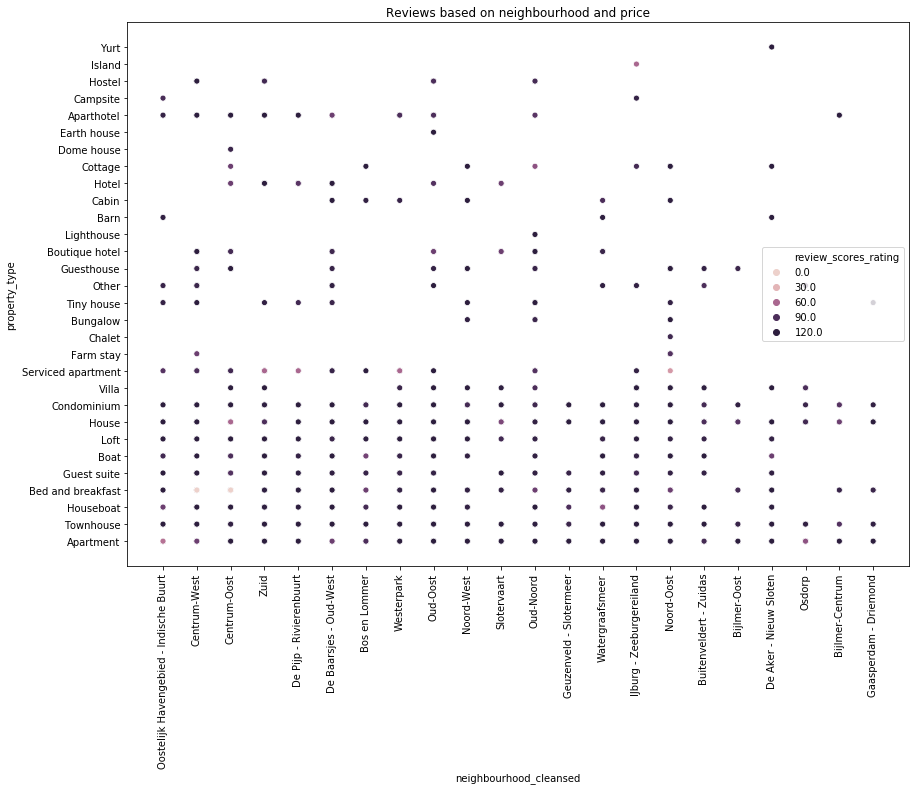

In [65]:
plt.figure(figsize=(14, 10))
sns.scatterplot(x='neighbourhood_cleansed', y='property_type', hue='review_scores_rating', data=features_df);
plt.xticks(rotation=90);
plt.title('Reviews based on neighbourhood and price');

In [66]:
ratings_per_property_type = features_df.groupby('property_type').review_scores_rating.mean()

In [67]:
ratings_per_property_type

property_type
Aparthotel             89.281690
Apartment              95.304276
Barn                   99.000000
Bed and breakfast      93.333333
Boat                   94.838462
Boutique hotel         93.911765
Bungalow               97.750000
Cabin                  97.166667
Campsite               94.000000
Chalet                 94.000000
Condominium            96.157895
Cottage                90.555556
Dome house             95.000000
Earth house           100.000000
Farm stay              89.857143
Guest suite            96.845455
Guesthouse             95.166667
Hostel                 91.928571
Hotel                  86.387097
House                  95.109063
Houseboat              96.131783
Island                 60.000000
Lighthouse            100.000000
Loft                   96.501684
Other                  95.333333
Serviced apartment     92.392157
Tiny house             98.250000
Townhouse              96.566547
Villa                  98.250000
Yurt                  100.000

Text(0.5, 1.0, 'Property type vs Ratings distribution')

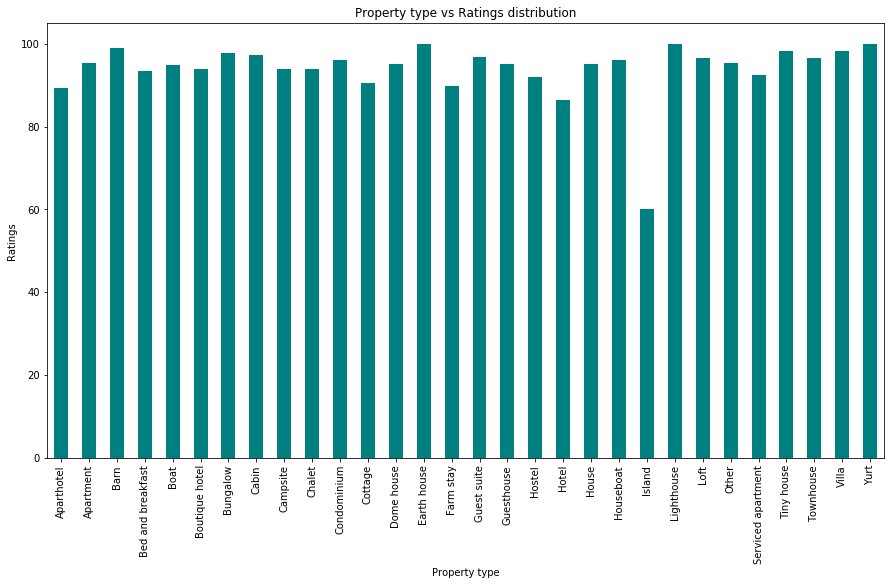

In [68]:
plt.figure(figsize=(15,8))
ratings_per_property_type.plot(kind='bar', color='teal')
plt.xlabel('Property type')
plt.ylabel('Ratings')
plt.title('Property type vs Ratings distribution')

In [69]:
ratings_per_bedrooms = features_df.groupby(['property_type', 'bedrooms']).review_scores_rating.mean()

In [70]:
ratings_per_bedrooms.sort_values(ascending=False)

property_type       bedrooms
Yurt                1           100.000000
Serviced apartment  4           100.000000
Earth house         1           100.000000
Cottage             2           100.000000
Aparthotel          4           100.000000
Lighthouse          3           100.000000
Serviced apartment  3           100.000000
Barn                4           100.000000
Villa               2            99.333333
Houseboat           5            99.333333
Villa               3            99.200000
Loft                5            99.000000
Bed and breakfast   4            99.000000
Villa               4            98.857143
Barn                2            98.500000
Tiny house          1            98.250000
Bed and breakfast   3            98.000000
House               6            98.000000
Cabin               2            98.000000
Houseboat           4            97.875000
Bungalow            1            97.750000
Villa               5            97.500000
Loft                2    

Text(0.5, 1.0, 'Property type with no of bedrooms vs Ratings distribution')

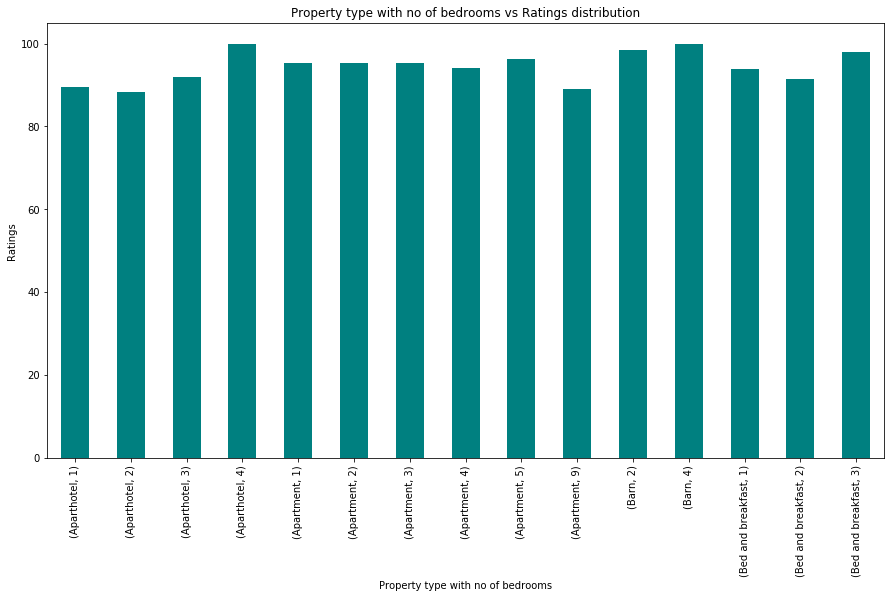

In [71]:
plt.figure(figsize=(15,8))
ratings_per_bedrooms[:15].plot(kind='bar', color='teal')
plt.xlabel('Property type with no of bedrooms')
plt.ylabel('Ratings')
plt.title('Property type with no of bedrooms vs Ratings distribution')

In [72]:
features_df.bathrooms.unique()

array([1, 2, 3, 4, 5])

In [73]:
ratings_per_bathroom = features_df.groupby(['property_type', 'bathrooms']).review_scores_rating.mean()

In [74]:
ratings_per_bathroom.sort_values(ascending=False)

property_type       bathrooms
Yurt                1            100.000000
Lighthouse          3            100.000000
Earth house         1            100.000000
Villa               3             99.500000
Townhouse           4             99.500000
Bed and breakfast   4             99.000000
Barn                2             99.000000
                    1             99.000000
Apartment           4             99.000000
Villa               2             99.000000
Houseboat           3             98.400000
Tiny house          1             98.250000
Condominium         3             98.000000
Loft                3             98.000000
Townhouse           5             98.000000
Bungalow            1             97.750000
Villa               1             97.562500
Guest suite         2             97.333333
Townhouse           2             97.210084
Cabin               1             97.166667
Townhouse           3             97.166667
Loft                2             97.161290
Ho

Text(0.5, 1.0, 'Property type with no of bathroom vs Ratings distribution')

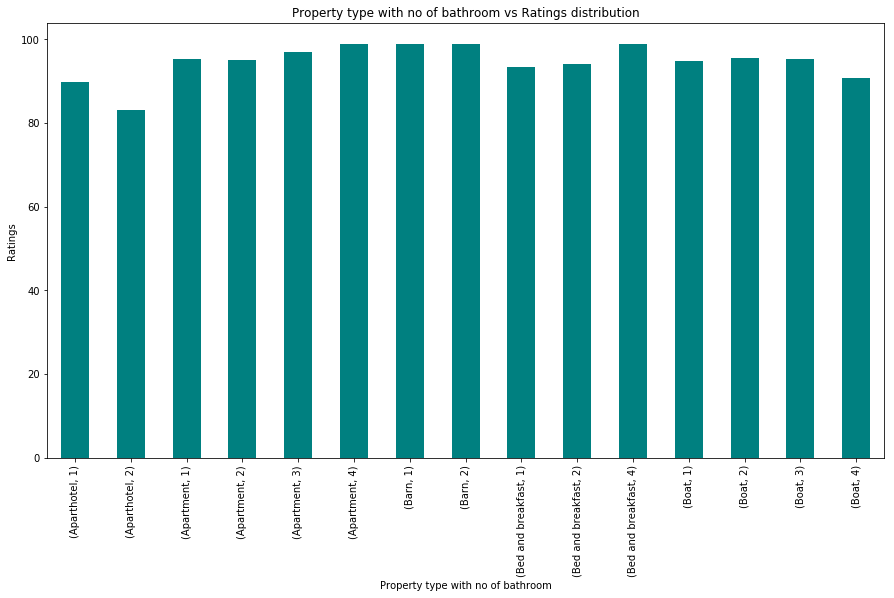

In [75]:
plt.figure(figsize=(15,8))
ratings_per_bathroom[:15].plot(kind='bar', color='teal')
plt.xlabel('Property type with no of bathroom')
plt.ylabel('Ratings')
plt.title('Property type with no of bathroom vs Ratings distribution')